# Word2Vec
Paper: https://arxiv.org/abs/1301.3781

<blockquote>You shall know a word by the company it keeps</blockquote>

<ul>
    <li>Word2Vec is group of related model that are used to produce <b>Word Embeddings</b>.</li>
    <li>Word2Vec takes a large corpus of text as input and produces a vector space.</li>
</ul>

## 1.1 Architecture

Word2vec has two architecture:
<ol>
    <li>CBOW - Continous Bag of Words</li>
    <li>Skipgram</li>
</ol>

<img src="images/word2vec_example.png">

## 1.2 CBOW - Continous Bag of Words

The model predicts the current word from a window of surrounding words
Example:
<table align="left">
    <tr><th>Context Word</th> <th> Current Word</th></tr>
    <tr><td>QUICK</td> <td> FOX </td></tr>
    <tr><td>BROWN</td> <td> FOX </td></tr>
    <tr><td>JUMPS</td> <td> FOX </td></tr>
    <tr><td>OVER</td> <td> FOX </td></tr>
</table>

## 1.3 Skipgram 

The model use the current word to predict the surrounding window of context words.
Example:
<table align="left">
    <tr><th>Current Word</th> <th> Context Word</th></tr>
    <tr><td>FOX</td> <td> QUICK </td></tr>
    <tr><td>FOX</td> <td> BROWN </td></tr>
    <tr><td>FOX</td> <td> JUMPS </td></tr>
    <tr><td>FOX</td> <td> OVER </td></tr>
</table>

## Imports

In [1]:
import numpy as np
import tensorflow as tf
import string
import nltk
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Read data file

In [2]:
data_file = "avengers_2012.txt"
f = open(data_file, "r")
raw_data = f.read()
raw_data = raw_data[:50000]

## Cleaning data

In [3]:
def clean_text(text):
    text = text.lower()

    text =  text.replace("\n", "")
    text = text.replace("\xad", "")
    text = text.replace("'ve", " have")
    text = text.replace("'t", " not")
    text = text.replace("'s", " is")
    text = text.replace("'m", " am")

    ## Specific Words
    text = text.replace("p.e.g.a.s.u.s", "pegasus")
    text = text.replace("s.h.i.e.l.d.", "shield")
    text = text.replace("s.h.i.e.l.d", "shield")
    text = text.replace("(v.o.)", "(vo)")
    text = text.replace("dr.", "dr")
    text = text.replace("...", "")
    text = text.replace("'", "")
    text = text.replace('"', "")

    ## Numbers with Word
    text = text.replace("0", " zero ")
    text = text.replace("1", " one ")
    text = text.replace("2", " two ")
    text = text.replace("3", " three ")
    text = text.replace("4", " four ")
    text = text.replace("5", " five ")
    text = text.replace("6", " six ")
    text = text.replace("7", " seven ")
    text = text.replace("8", " eight ")
    text = text.replace("9", " nine ")

    punc = set(string.punctuation)
    for p in punc:
        if p != ".":
            #text = text.replace(p, " " + p + " ")
            text = text.replace(p, " ")

    text = " ".join(text.split())

    return text

In [4]:
data = clean_text(raw_data)

In [5]:
data

'the avengers written by joss whedon and there came a day a day unlike any other when earth is mightiest heroes and heroines found themselves united against a common threat. on that day the avengers were born to fight the foes no single superhero could withstand through the years their roster has prospered changing many times but their glory has never been denied heed the call then for now the avengers assemble burning blue flames. a smoky cube shape emerges the tesseract. filling the screen with blackness. cut to ext. throne room space night kneeling behind a throne a clothed armored figure known as the other bows. the other vo the tesseract has awakened. it is on a little world. a human world. they would wield its power cut to the other faces a horned shaped shadow. loki. loki is handed the chitauri scepter a long golden handle fitted with a blue gem encircled with silver blades. the other vo but our ally knows its workings as they never will. he is ready to lead. and our force our c

## Spliting data into lines

In [6]:
split_data = []

stopwords = nltk.corpus.stopwords.words("english")

for lines in data.split("."):
    tmp_line = []
    for word in lines.strip().split(" "):
        if word not in stopwords:
            if len(word) > 0:
                tmp_line.append(word)
    if len(tmp_line) > 0:
        split_data.append(tmp_line)

In [7]:
split_data[0]

['avengers',
 'written',
 'joss',
 'whedon',
 'came',
 'day',
 'day',
 'unlike',
 'earth',
 'mightiest',
 'heroes',
 'heroines',
 'found',
 'united',
 'common',
 'threat']

## Preparing dictionary

In [9]:
def prepare_dictionary(data):
    idx = 0
    word2idx = {}
    idx2word = {}

    for line in data:
        for word in line:
            if word not in word2idx.keys():
                word2idx[word] = idx
                idx2word[idx] = word
                idx += 1
    vocab_size = len(word2idx.keys())
    return vocab_size, word2idx, idx2word

In [10]:
vocab_size, word2idx, idx2word = prepare_dictionary(split_data)
print("Vocab Size: ", vocab_size)

Vocab Size:  1328


## Preparing dataset

<img src="images/skipgram_example.png">

In [12]:
def prepare_dataset(data, word2idx, vocab_size, window=5):
    X = []
    Y = []

    for line in data:
        fn = window//2
        line_len = len(line)

        if line_len > window:
            for i in range(line_len):
                a = line[i]
                b = []
                for j in range(window):
                    idx = i+j-fn
                    if (idx != i) and (idx >= 0 and idx < line_len):
                        x = word2idx[line[i]]
                        y = word2idx[line[idx]]

                        X.append(x)
                        Y.append(y)
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

In [13]:
X, Y = prepare_dataset(split_data, word2idx, vocab_size)

In [14]:
print(split_data[0])

for i in range(10):
    print("{:10s} - {:10s}".format(idx2word[X[i]], idx2word[Y[i]]))

['avengers', 'written', 'joss', 'whedon', 'came', 'day', 'day', 'unlike', 'earth', 'mightiest', 'heroes', 'heroines', 'found', 'united', 'common', 'threat']
avengers   - written   
avengers   - joss      
written    - avengers  
written    - joss      
written    - whedon    
joss       - avengers  
joss       - written   
joss       - whedon    
joss       - came      
whedon     - written   


## Onehot Encoding

In [15]:
def onehot_encoding(x, y):
    X = tf.one_hot(x, vocab_size)
    Y = tf.one_hot(y, vocab_size)
    return X, Y

## Generate dataset batches

In [16]:
def batch_dataset(x, y, batch_size=1024, prefetch=2):
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    dataset = dataset.map(onehot_encoding)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(prefetch)
    itr = dataset.make_initializable_iterator()
    return itr.initializer, itr.get_next()

## TensorFlow Graph
<img src="images/nn.png">

In [17]:
x_inputs = tf.placeholder(tf.float32, shape=[None, vocab_size])
y_labels = tf.placeholder(tf.float32, shape=[None, vocab_size])
global_step = tf.train.create_global_step()

embed_dim = 32

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_uniform([vocab_size, embed_dim]))
b1 = tf.Variable(tf.random_uniform([1]))
hidden_layer = tf.add(tf.matmul(x_inputs, W1), b1)

# output layer
W2 = tf.Variable(tf.random_uniform([embed_dim, vocab_size]))
b2 = tf.Variable(tf.random_uniform([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_labels * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.AdamOptimizer().minimize(loss)

In [18]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
saver = tf.train.Saver()

In [19]:
saver.restore(sess, save_path="weights/word2vec-0")

INFO:tensorflow:Restoring parameters from weights/word2vec-0


In [20]:
for i in range(100):
    itr, data = batch_dataset(X, Y)
    sess.run(itr)

    loss_val = []
        
    while True:
        try:
            bx, by = sess.run(data)
            _, l = sess.run([train_op, loss], feed_dict={x_inputs: bx, y_labels: by})
            loss_val.append(l)
                
        except tf.errors.OutOfRangeError as e:
            break
                
    if (i+1) % 10 == 0:
        loss_mean_val = np.mean(loss_val)
        print("Epoch: {0} - Loss: {1}".format(i+1, loss_mean_val))
        saver.save(sess, save_path="weights/word2vec", global_step=global_step)

Epoch: 10 - Loss: 2.441011905670166
Epoch: 20 - Loss: 2.4338254928588867
Epoch: 30 - Loss: 2.427147150039673
Epoch: 40 - Loss: 2.4209327697753906
Epoch: 50 - Loss: 2.4151387214660645
Epoch: 60 - Loss: 2.4097177982330322
Epoch: 70 - Loss: 2.40464448928833
Epoch: 80 - Loss: 2.399886131286621
Epoch: 90 - Loss: 2.395413637161255
Epoch: 100 - Loss: 2.391204357147217


In [21]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)

words = list(word2idx.keys())
print(words[0],  vectors[0])

avengers [ 1.1836026   0.6155797   2.383083    0.88270366  2.141948    1.7066158
  2.039704   -1.9267589   0.58324176  0.61981374 -0.84366834 -0.596802
  0.38160467 -0.75664043  0.80134076  2.8719337  -1.0598067  -0.9569446
  1.1635163  -0.6129236   2.7833734  -1.4550601   0.30841702  0.84595263
  0.40645856  1.8253199   0.40617433  0.2804525   0.33315212  1.7405169
 -1.522557    1.729574  ]


## Compress the word vectors into 2D space and plot them

In [22]:
tsne = TSNE(n_components=2, random_state=0)
X_embed = tsne.fit_transform(vectors)

points = pd.DataFrame(X_embed, columns = ['x', 'y'], dtype="float64")
points["word"] = words
points

,x,y,word
0,-15.287759,2.814969,avengers
1,30.874569,39.706966,written
2,31.055056,40.415035,joss
3,31.056156,40.422001,whedon
4,30.633831,38.791214,came
5,-2.152843,13.593623,day
6,9.291057,47.437916,unlike
7,11.324024,43.792717,earth
8,10.405585,47.373848,mightiest
9,9.712124,47.865486,heroes


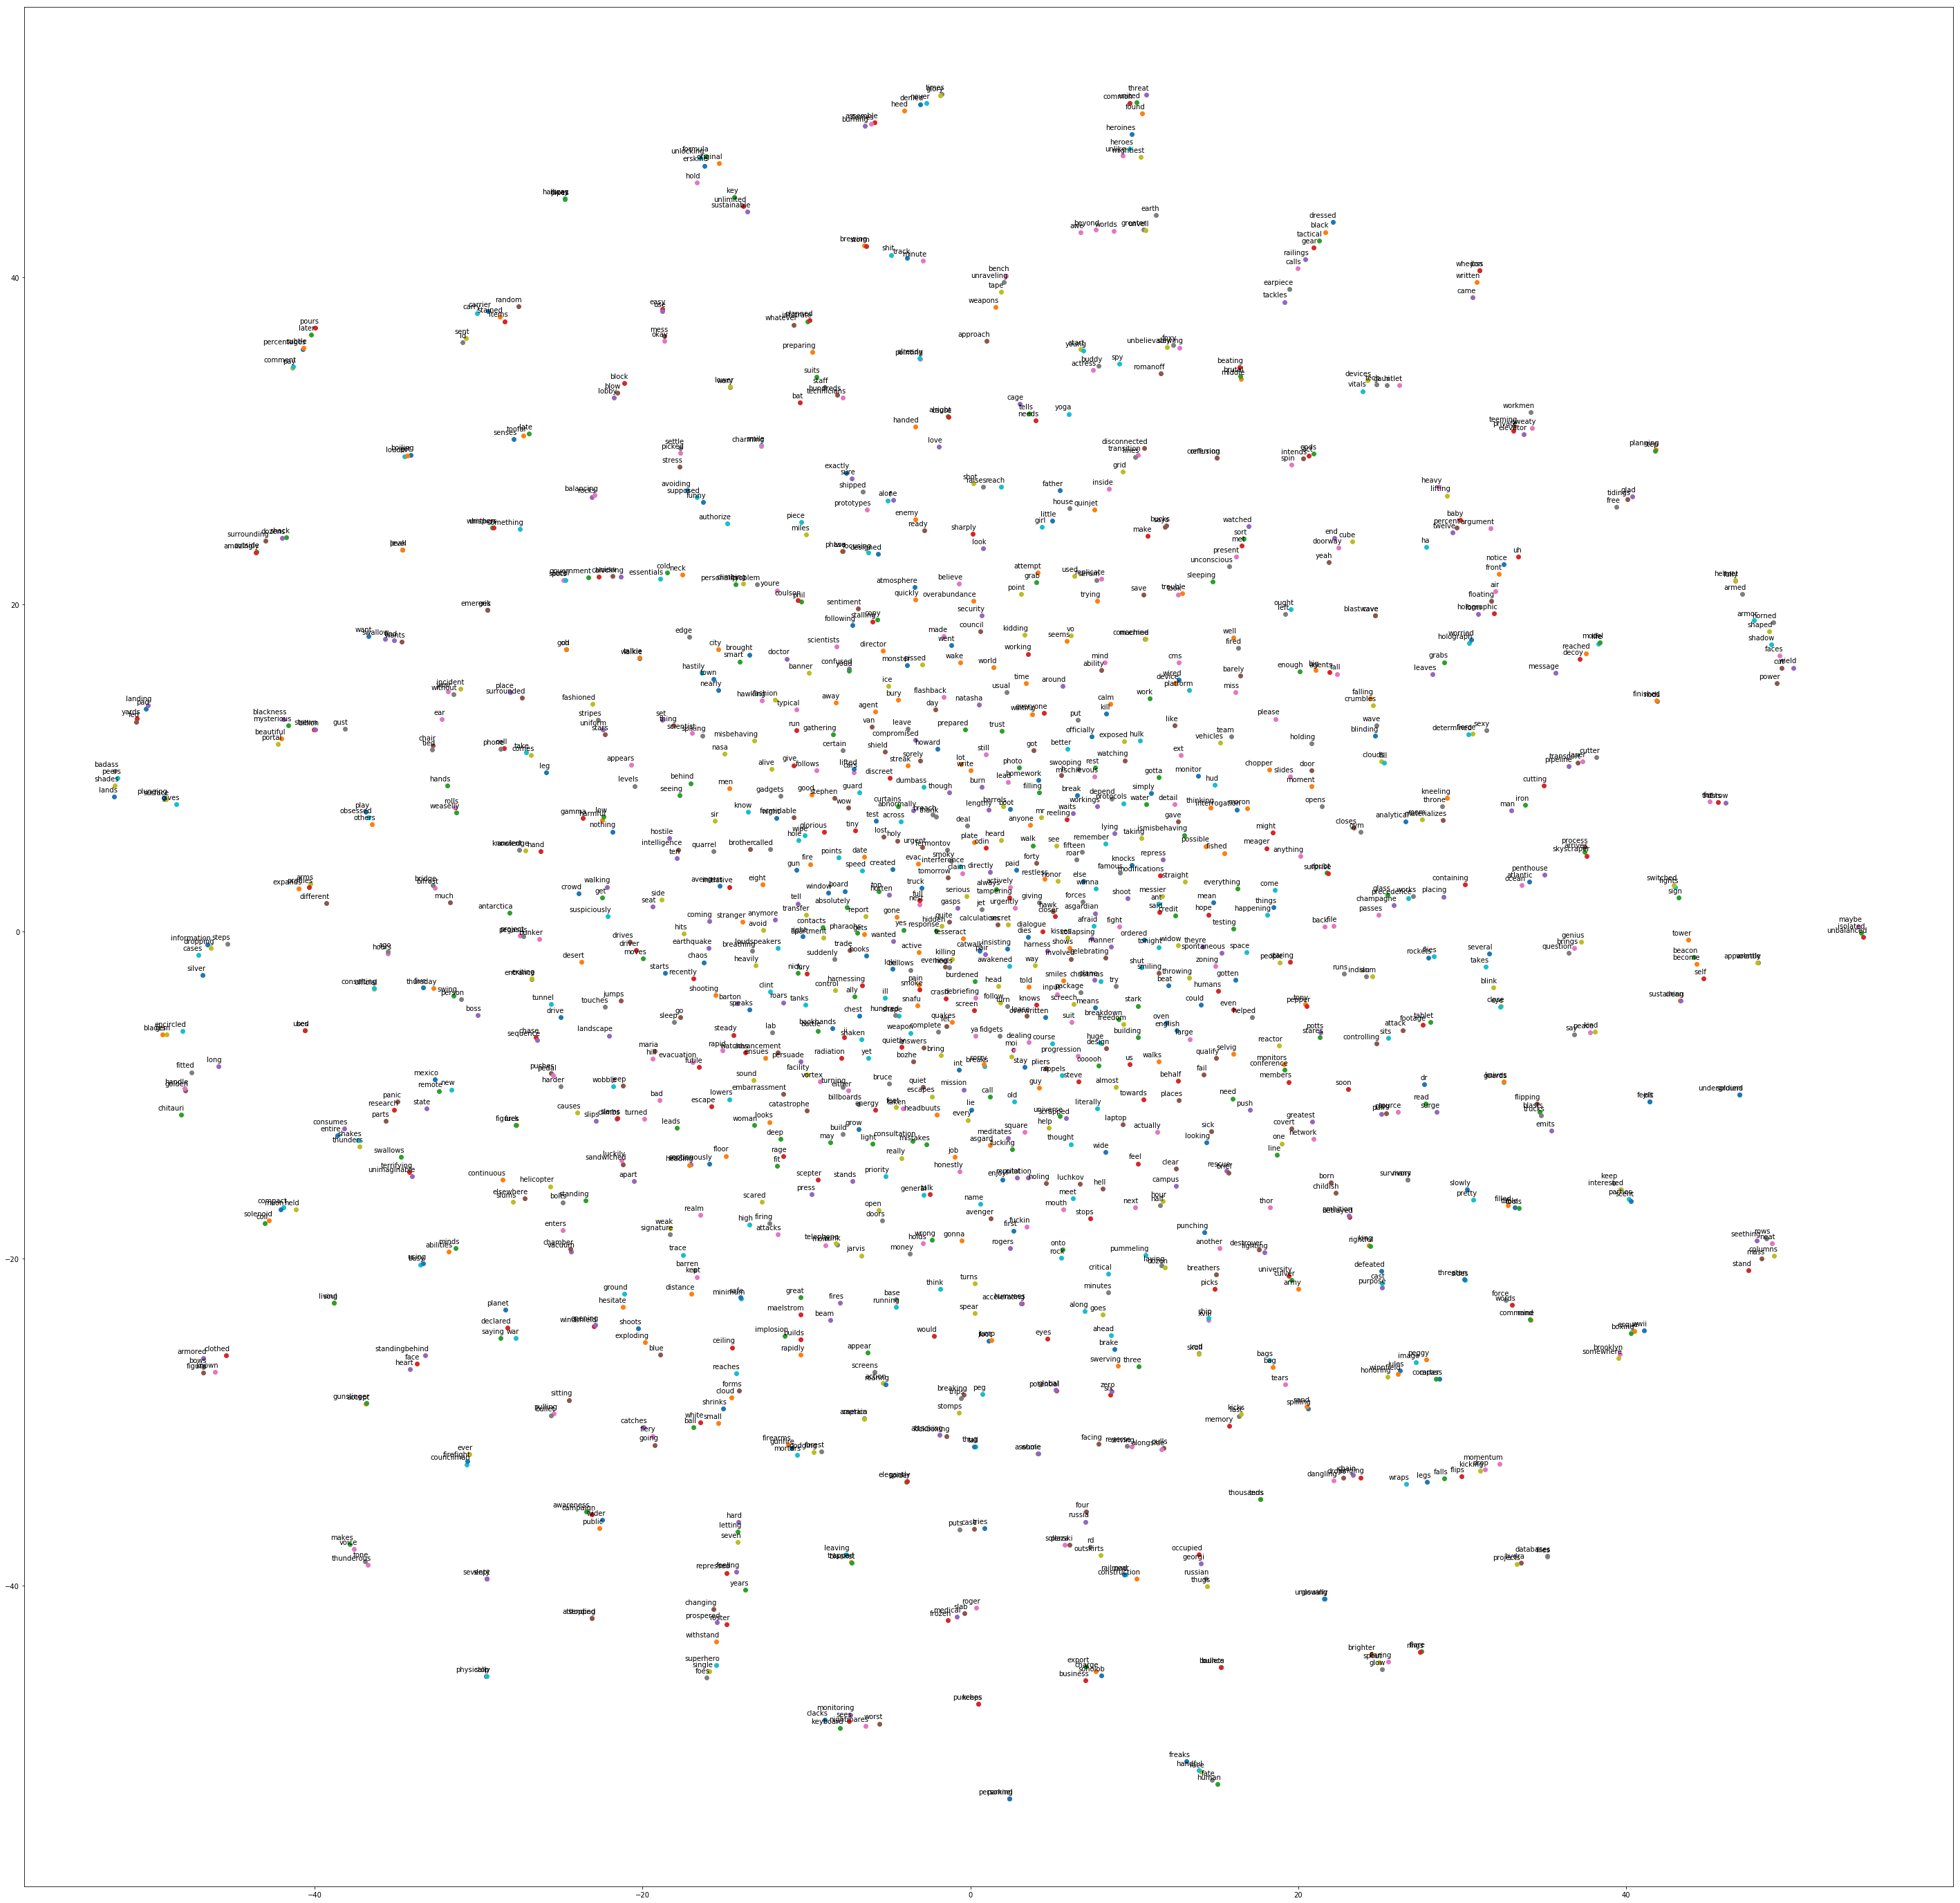

In [23]:
plt.figure(figsize=(50, 50))
for i in range(len(words)):
    word = words[i]
    x = points.x[i]
    y = points.y[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 5), textcoords='offset points', ha='right', va='bottom')
plt.savefig("word2vec.png")
plt.show()

In [24]:
word2vec_dict = {words[i]: vectors[i] for i in range(len(words))}

In [25]:
def cosine_sim(a, b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [26]:
print(cosine_sim(word2vec_dict["coulson"], word2vec_dict["phil"]))
print(cosine_sim(word2vec_dict["iron"], word2vec_dict["man"]))
print(cosine_sim(word2vec_dict["shield"], word2vec_dict["avengers"]))

0.862947
0.7791249
0.2254642


In [27]:
def similarity(a, k=20):
    a_vec = word2vec_dict[a]
    
    word_sim = {}
    
    for key in word2vec_dict:
        sim = cosine_sim(a_vec, word2vec_dict[key])
        word_sim[key] = sim
    sim = sorted(word_sim.items(), key=lambda kv: kv[1])
    sim.reverse()
    sim = sim[1:k+1]
    return sim

In [31]:
similarity("king")

[('rightful', 0.8751166),
 ('cast', 0.7947455),
 ('ambition', 0.7919659),
 ('defeated', 0.7884597),
 ('date', 0.7794909),
 ('meditates', 0.766669),
 ('betrayed', 0.7666371),
 ('overwritten', 0.7636995),
 ('heard', 0.75663793),
 ('restless', 0.75425893),
 ('asgardian', 0.7540152),
 ('reputation', 0.7533254),
 ('bellows', 0.75251055),
 ('knows', 0.7520941),
 ('board', 0.7480699),
 ('rest', 0.7478128),
 ('across', 0.747563),
 ('odin', 0.74527085),
 ('active', 0.74327767),
 ('square', 0.7418473)]